# Ejercicio en clase: Clustering

*(Traducido y adaptado del curso "Machine Learning" de Andrew NG)*

Este ejercicio tiene como objetivos:

* Implementar el algoritmo de clustering k-means
* Aplicar k-means en la compresión de una imagen

## Implementación de k-means

El algoritmo de k-means es un método para agrupar automáticamente ejemplos de datos semejantes. Concretamente, se tiene un set $\{x^{(1)}, ..., x^{(m)}\}$ donde $x^{(i)} \in \mathbb{R}^n$, y se desea agrupar los datos en unos pocos "clusters" compactos. La intuición subyacente a k-means es un procedimiento iterativo que empieza por suponer los centroides iniciales, y luego refina la suposición asignando los ejemplos a sus centroides más cercanos y recalculando los centroides a partir de las asignaciones.

El algoritmo k-means es como sigue:

```python
# Inicializar centroides
centroids = kMeansInitCentroids(X, K)

for i in range(iterations):
    # Paso 1 - Asignación a clusters: Asignar cada punto de datos
    # al centroide más cercano. idx es un vector de asignación a
    # centroides, donde idx(i) es c^(i), es decir, el índice del
    # centroide asignado al ejemplo i.
    # idx(i) corresponde a 
    idx = findClosestCentroids(X, centroids)
    
    # Paso 2 - Mover los centroides: Calcular la media de los puntos
    # asignados a cada centroide
    centroids = computeMeans(X, idx, K)
```

El bucle interno del algoritmo realiza repetidamente dos pasos: (i) Asignar cada ejemplo de entrenamiento $x^{(i)}$ a su centroide más cercano, y (ii) Recalcular la media de cada centroide usando los puntos que le han sido asignados. El algoritmo k-means siempre convergerá a algún conjunto final de medias para los centroides. Ten en cuenta que la solución obtenida no siempre será la idea y depende de la configuración inicial de los centroides. Por lo tanto, en la práctica el algoritmo k-means es usualmente ejecutado varias veces con diferentes inicializaciones aleatorias. Una manera de escoger entre estas diferentes solcucones de diferentes inicializaciones aleatorias es escoger aquella que tenga un menor valor para la función de costo (distorsión).

En las siguientes dos secciones vas a implementar en dos fases el algoritmo de k-means.

### Encontrar los centroides más cercanos

En la fase de "asignación a clusters" del algoritmo k-means, el algoritmo asigna cada ejemplo de entrenamiento $x^{(i)}$ a su centroide más cercano, dada la posición actual de los centroides. Específicamente, para cada ejemplo $i$ asignamos:

$x^{(i)} := j$ que minimice $||x^{(i)} - \mu_j||^2$

donde $c^{(i)}$ es el índice del centroide más cercano a $x^{(i)}$, y $\mu_j$ es la posición (valor) del centroide del cluster $j$. Ten en cuenta que $c^{(i)}$ corresponde a `idx(i)` en el código.

Tu tarea es completar el código en la función `findClosestCentroids`. Esta función toma la matriz de datos X y la ubicación de todos los centroides dentro de `centroids` y debe retornar un arreglo unidimensional `idx` que contenga el índice (un valor en $\{0, ..., K-1\}$, donde $K$ es el número total de centroides) del centroide más cercano a cada ejemplo de entrenamiento.

Puedes implementar la función realizando un bucle que recorra cada ejemplo de entrenamiento y cada centroide.

In [90]:
import numpy as np
from scipy.io import loadmat
from scipy.spatial import distance

def findClosestCentroids(X, centroids):

    # Calculamos el número de centroides K
    K = centroids.shape[0]

    # Calculamos el número de ejemplos m
    m = X.shape[0]

    # Tienes que devolver el valor correcto de idx. Lo inicializamos en cero.
    idx = np.zeros(m, dtype=int)

    # ====================== COMPLETA TU CÓDIGO ABAJO ======================
    # Instrucciones: Recorre cada ejemplo, encuentra su centroide más cercano,
    # y almacena el índice en la ubicación correcta de idx. Específicamente,
    # idx es un vector de dimensiones m x 1, donde idx(i) debe contener el índice
    # del centroide más cercano al ejemplo i. Por lo tanto, debe contener valores
    # en el rango 0...(K-1)
    #
    # Nota: Puedes usar bucles 'for' 
    
    for i, example in enumerate(X):        
        min_dist = 10000;
        min_idx = -1;
        for j, centroid in enumerate(centroids):
            dist_points = distance.euclidean(example, centroid)
            if dist_points <= min_dist:
                min_dist = dist_points
                min_idx = j
                
        idx[i] = min_idx
                
    # =============================================================
    
    return idx

Ahora ejecuta el siguiente código para probar la función `findClosestCentroids` que has implementado:

In [91]:
print('Encontrando los centroides más cercanos... \n');

# Cargar el conjunto de datos que usaremos
exdata2 = loadmat('ex7data2.mat')
X = np.array(exdata2['X'])

# Seleccionar un conjunto inicial de centroides
K = 3  # 3 centroides
initial_centroids =  np.array([(3., 3.), (6., 2.), (8., 5.)])

# Encontrar los centroides iniciales más cercanos a los ejemplos
idx = findClosestCentroids(X, initial_centroids)

print('Centroides más cercanos a los primeros 3 ejemplos: ', idx[0:3])
print('(los centroides más cercanos deberían ser 0, 2 y 1, respectivamente)\n');


Encontrando los centroides más cercanos... 

Centroides más cercanos a los primeros 3 ejemplos:  [0 2 1]
(los centroides más cercanos deberían ser 0, 2 y 1, respectivamente)



**Pregunta 1:** ¿Cuál es el índice de los centroides más cercanos a los 3 últimos ejemplos?

In [92]:
print('Centroides más cercanos a los últimos 3 ejemplos: ', idx[-3:])

Centroides más cercanos a los últimos 3 ejemplos:  [1 1 0]


### Recalcular la posición de los centroides

Luego de asignar cada punto a un centroide, la segunda fase del algoritmo recalcula, para cada centroide, la media de los puntos que le fueron asignados. Específicamente, para cada centroide $k$, establecemos

$\mu_k := \frac{1}{|C_k|} \sum\limits_{i \in C_k} x^{(i)}$

donde $|C_k|$ es el conjunto de ejemplos que fueron asignados al centroide $k$. Específicamente, si sólo dos ejemplos, digamos $x^{(3)}$ y $x^{(5)}$, son asignados al centroide $k =2$, entonces, deberías actualizar $\mu_2 = \frac{1}{2} (x^{(3)} + x^{(5)})$.

Ahora debes completar el código en la función `computeCentroids`. Luego ejecuta el siguiente bloque de código para calcular los centroides después del primer paso de k-means.

In [93]:
def computeCentroids(X, idx, K):

    # Calculamos el número de ejemplos m y el número de características n
    (m, n) = X.shape

    # Tienes que devolver el valor correcto de cada centroide. Los inicializamos en cero.
    centroids = np.zeros((K, n))

    # ====================== COMPLETA TU CÓDIGO ABAJO ======================
    # Instrucciones: Recorre cada centroide y calcula la media de todos los puntos
    # que le han sido asignados. Especificamente, el vector fila centroids[i]
    # debe contener la media de los puntos de datos asignados al centroide i.
    #
    # Nota 1: Puedes usar bucles 'for' 
    # Nota 2: X[idx == 2] es el subconjunto de puntos de datos asignados al centroide 2.
    # Nota 3: Se puede calcular la media con la función numpy.mean(). No olvidar asignar
    #         el parámetro axis=0 para calcular la media de las filas.
    # 

    for i, centroid in enumerate(centroids):        
        centroids[i] = np.mean(X[idx==i], axis=0)        
       
    # =============================================================

    return centroids

In [94]:
print('Recalculando la posición de los centroides... \n');

# Recalcular los centroides a partir de las asignaciones realizadas en el paso anterior
centroids = computeCentroids(X, idx, K)

print('Centroides calculados después de encontrar reasignar los puntos al centroide más cercano:')
print(centroids)

print('\n(Los dos primeros centroides deberían ser:')
print('[[ 2.42830111  3.15792418]')
print(' [ 5.81350331  2.63365645]] )')

Recalculando la posición de los centroides... 

Centroides calculados después de encontrar reasignar los puntos al centroide más cercano:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

(Los dos primeros centroides deberían ser:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]] )


**Pregunta 2:** ¿Cuál es la posición del último centroide?

In [95]:
#[ 7.11938687  3.6166844 ]

### Ejecutar k-means en el conjunto de datos

Después que has completado las dos funciones (`findClosestCentroids` y `computeCentroids`), vamos a ejecutar el algoritmo k-means en este conjunto de datos 2D para que puedas apreciar cómo funciona k-means. Hemos preparado una función `runkMeans` que invoca a tus funciones. Te recomendamos que eches un vistazo a la función `runkMeans` para que entiendas cómo trabaja. Observa que el código invoca las funciones que implementaste dentro de un bucle. Cuando ejecutes el siguiente paso, el código de k-means producirá una visualización que muestra el progreso del algoritmo en cada iteración.

Presiona `Intro` múltiples veces para ver cómo cada paso del algoritmo k-means cambian tanto los centroides como la asignación a clusters (colores).

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    
    # Inicializar los valores
    (m, n) = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m, dtype=int)

    # Llevaremos un historial de los centroides por cada cluster y cada iteración
    centroids_history = np.zeros((K, max_iters + 1, n))
    centroids_history[:,0] = initial_centroids

    # Ejecutar k-means
    for i in range(max_iters):
    
        # Estatus de avance
        print('Iteración de k-means %d/%d...' % ((i+1), max_iters))
        
        # Asignar cada de ejemplo en X a su centroide más cercano
        idx = findClosestCentroids(X, centroids)
        
        # Opcionalmente, mostrar diagrama con avance
        if plot_progress:
            centroids_history[:,i] = centroids
            plotProgresskMeans(X, centroids, centroids_history, idx, K, i)
            input('Presiona Intro para continuar.')

        # Calcular los nuevos centroides luego de las asignaciones a clusters
        centroids = computeCentroids(X, idx, K)
        
    return (centroids, idx)

In [97]:
def plotProgresskMeans(X, centroids, centroids_history, idx, K, i):
    
    plt.title('Iteración #%d' % (i+1) )
    
    # Dibujar los ejemplos del conjunto de datos
    plt.scatter(X[:,0], X[:,1], c=idx, cmap='prism')
    
    # Dibujar el avance desde los centroides iniciales
    for j in range(K):
        plt.plot(centroids_history[j, 0:(i+1), 0], centroids_history[j, 0:(i+1), 1], '-', c='gray')
        plt.scatter(centroids_history[j, 0:i, 0], centroids_history[j, 0:i, 1], marker='d', c='gray')
    
    # Dibujar los centroides
    plt.scatter(centroids[:,0], centroids[:,1], c='k', marker='x')

    plt.show()

    return

Ejecutando clustering de k-means en el conjunto de datos... 

Iteración de k-means 1/10...


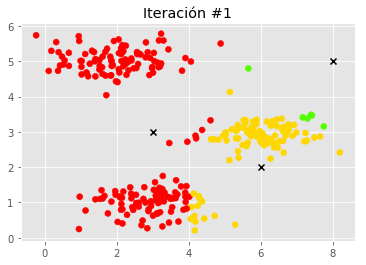

Presiona Intro para continuar.
Iteración de k-means 2/10...


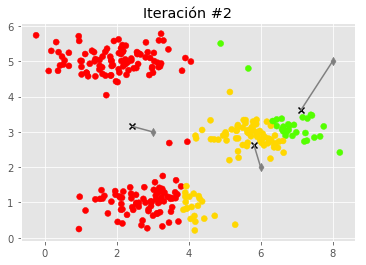

Presiona Intro para continuar.
Iteración de k-means 3/10...


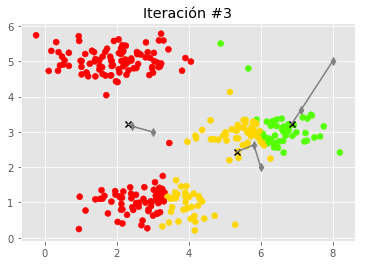

Presiona Intro para continuar.
Iteración de k-means 4/10...


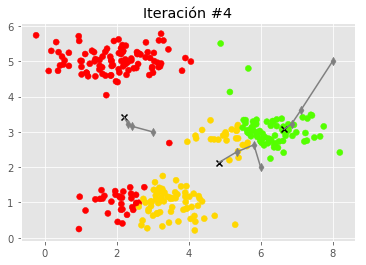

Presiona Intro para continuar.
Iteración de k-means 5/10...


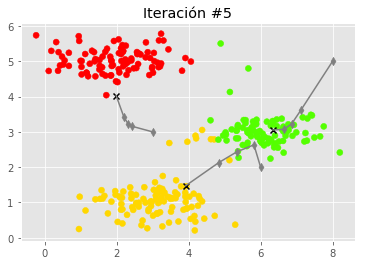

Presiona Intro para continuar.
Iteración de k-means 6/10...


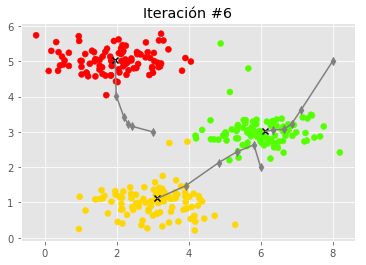

Presiona Intro para continuar.
Iteración de k-means 7/10...


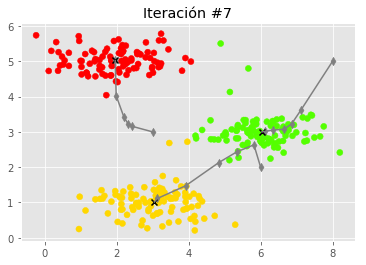

Presiona Intro para continuar.
Iteración de k-means 8/10...


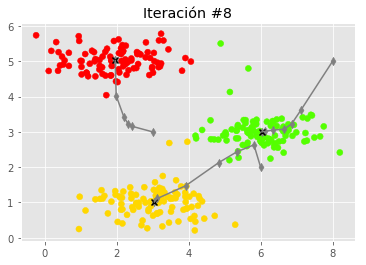

Presiona Intro para continuar.
Iteración de k-means 9/10...


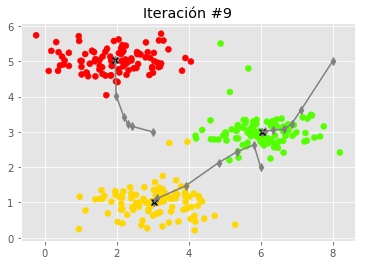

Presiona Intro para continuar.
Iteración de k-means 10/10...


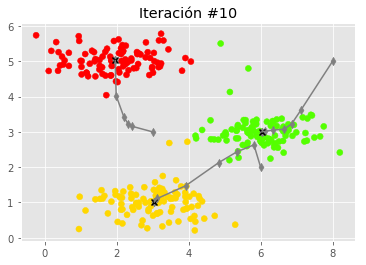

KeyboardInterrupt: 

In [98]:
print('Ejecutando clustering de k-means en el conjunto de datos... \n');

# Cargar el conjunto de datos
exdata2 = loadmat('ex7data2.mat')
X = np.array(exdata2['X'])

# Parámetros de k-means
K = 3
max_iters = 10

# Por consistencia, configuramos acá unos valores específico pero en la práctica
# habrá que generarlos automáticamente de manera aleatoria, como se verá más
# adelante en kMeansInitCentroids
initial_centroids =  np.array([(3., 3.), (6., 2.), (8., 5.)])

# Ejecutar el algoritmo k-means
(centroids, idx) = runkMeans(X, initial_centroids, max_iters, plot_progress=True)
print('\nFin de ejecución de k-means.')

### Inicialización aleatoria

Las asignaciones iniciales de los centroides para el ejemplo anterior fueron diseñadas para que todos tengamos los mismos resultados. En la práctica, una mejor estrategia para inicializar los centroides es seleccionar ejemplos aleatorios del conjunto de entrenamiento.

Definamos una función que nos permita inicializar los centroides a partir de ejemplos aleatorios del conjunto de datos.

In [100]:
from numpy.random import permutation

def kMeansInitCentroids(X, K):
    
    # Calcular el número de ejemplos
    m = X.shape[0]
    
    # Reordernar aleatoriamente los índices de los ejemplos
    randidx = permutation(m)
    
    # Tomar los primeros K ejemplos como centroides
    centroids = X[randidx[0:K]]
    
    return centroids

El código de arriba empieza por permutar aleatoriamente los índices de los ejemplo (usando `numpy.random.permutation`). Luego selecciona los primeros `K` ejemplos basados en la permutación aleatoria de los índices. Esto permite seleccionar los ejemplos aleatoriamente sin riesgo de seleccionar dos veces el mismo ejemplo.

## Compresión de imágenes usando k-means

![](macaw_small.jpg)
*Imagen original 256x256 pixels, 24 bits de color.*
*Fuente: https://pixabay.com/p-943228/?no_redirect *

En este ejercicio, aplicarás k-means a una tarea de compresión de imágenes. Usualmente, cuando una imagen es representada con 24 bits de color, cada pixel corresponde a tres enteros de 8 bits sin signo (con valores entre 0 y 255), que especifican los valores de intensidad de rojo, verde y azul. Esta codificación es conocida como codificación RGB. Nuestra imagen contiene miles de colores, y en esta parte del ejercicio, vas a reducir el número de colores a 16 colores.

Haciendo esta reducción, es posible representar (comprimir) la foto de una manear eficiente. Específicamente, sólo necesitas almacenar los valores RGB de los 16 colores seleccionados, y para cada pixel en la imagen sólo necesitas almacenar el índice el color en esa ubicación (donde sólo se requiere 4 bits para representar 16 posibilidades).

En este ejercicio, usarás el algoritmo k-means para seleccionar los 16 colores que serán usados para representar la imagen comprimida. En particular, tratarás cada pixel de la imagen original como un ejemplo de un conjunto de datos, y usarás el algoritmo k-means para encontrar los 16 colores que mejor agrupan (cluster) los pixels en el espacio RGB, de tres dimensiones. Una vez que hayas calculado los centroides de cada cluster en la imagen, usaras los 16 colores para reemplazar los pixels en la imagen original.

### k-means para pixeles

En Python, se puede leer imágenes con el siguiente comando:

```python
from scipy import misc

A = misc.imread('imagen.png')
```

Esto crea una matrix tridimensional A cuyos dos primeros índices identifican la posición del pixel y cuyo último índice representa rojo, verde o  azul. Por ejemplo, `A[50, 33, 3]` es la intensidad de azul del pixel en la fila 50 y columna 33.

El código a continuación empieza por cargar la imagen, luego la transforma en una matrix de `m x 3` pixels a color (donde `m = 65536 = 256 x 256`), y luego invoca tu función k-means.

In [101]:
print('Ejecutando clustering de k-means en los pixels de una imagen... \n');

# Cargar la imagen de un guacamayo
from scipy import misc

# Cargar la imagen y convertirla en un arreglo numpy
A = misc.imread('macaw_small.jpg')
A = np.asarray(A, dtype=float)

# Dividir entre 255 para que los valores estén en el rango 0 - 1
A = A / 255

# Tamaño de la imagen
img_size = A.shape

# Convertir la imagen en una matrix N x 3, donde N = número de pixels.
# Cada fila contiene los valores de Rojo, Verde y Azul
# Esto nos da la matriz del conjunto de datos X que usaremos con k-means
X = A.reshape((img_size[0] * img_size[1], 3))

# Ejecuta tu algoritmo k-means en estos datos
# Prueba con diferentes valores de K y max_iters
K = 16
max_iters = 10

# Cuando se usa k-means, es importante inicializar aleatoriamente los centroides
# Usaremos la función kMeansInitCentroids
initial_centroids = kMeansInitCentroids(X, K)

# Ejecutar k-means
(centroids, idx) = runkMeans(X, initial_centroids, max_iters)

Ejecutando clustering de k-means en los pixels de una imagen... 

Iteración de k-means 1/10...
Iteración de k-means 2/10...
Iteración de k-means 3/10...
Iteración de k-means 4/10...
Iteración de k-means 5/10...
Iteración de k-means 6/10...
Iteración de k-means 7/10...
Iteración de k-means 8/10...
Iteración de k-means 9/10...
Iteración de k-means 10/10...


### Compresión de la imagen

Después de encontrar los `K = 16` colores que mejor representan la imagen, puedes ahora asignar cada pixel a su centroide más cercano usando la función `findClosestCentroids`. Esto te permitirá representar la imagen original usando las asignaciones de centroide de cada pixel. Observa que con ello has reducido significativamente el número de bits requeridos para describir la imagen. La imagen original requería 24 bits para cada uno de las 256 x 256 ubicaciones de pixel, resultando en un total de 256 x 256 x 24 = 1'572,864 bits. La nueva representación requiere almacenar un diccionario de 16 colores, cada uno de los cuales requiere 24 bits, pero la imagen en sí sólo requiere 4 bits por pixel. El número total de bits usado es por lo tanto 16 x 24 + 256 x 256 x 4 = 262,528 bits, lo cual significa una compresión de la imagen original por un factor de 6.

Finalmente, puedes ver los efectos de la compresión reconstruyendo la imagen basada solamente en la asignación de centroides. Específicamente, puedes reemplazar cada pixel con el valor del centroide al que ha sido asignado. Aunque la imagen resultante retiene la mayoría de características de la original, podemos observar algunos efectos de la compresión.

Aplicando k-means para comprimir una imagen... 



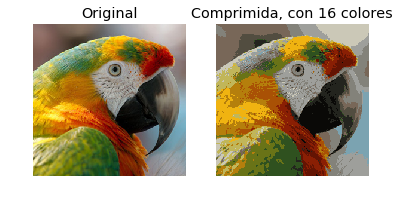

In [102]:
print('Aplicando k-means para comprimir una imagen... \n');

# Encontrar los centroides más cercanos a cada pixel
idx = findClosestCentroids(X, centroids)

# Esencialmente, hemos representado la imagen X en función 
# de los índices en idx

# Ahora podemos recuperar la imagen a partir de los índices (idx)
# mapeando cada pixel (identificado con su índice en idx) al valor
# de su centroide
X_recovered = centroids[idx]

# Transformar la imagen recuperada en sus dimensiones originales
X_recovered = X_recovered.reshape((img_size[0], img_size[1], 3))

# Mostrar la imagen original y la recuperada
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.axis('off')
ax1.imshow(A)
ax1.set_title('Original')
ax2.axis('off')
ax2.imshow(X_recovered)
ax2.set_title('Comprimida, con %d colores' % K)


### Opcional: Usa tu propia imagen

Modifica el código que hemos provisto y úsalo en una imagen de tu elección. Ten en cuenta que si la imagen es muy grande, k-means puede tomar mucho tiempo en ejecutarse. Por lo tanto, te recomendamos que reduzcas el tamaño de tu imagen o uses una imagen de un tamaño manejable antes de ejecutar el código. También puedes variar K para ver los efectos de la compresión.

### Opcional: Compara con la implementación de `scikit-learn`

Si lo deseas, compara los resultados de tu implementación con la que viene en scikit-learn y visualiza la imagen resultante al lado de la que comprimiste con nuestra implementación. El código para correr k-means sería:

```python
from sklearn.cluster import KMeans
K = 16

# Definición del modelo
# Se puede añadir verbose=1 para seguir la ejecución
modeloKMeans = KMeans(n_clusters=K) 

# Ajuste del modelo
# Nota que por ser clustering sòlo se entrena con 'X', no hay 'y'
modeloKMeans.fit(X)

# Los K centroides
centroids = modeloKMeans.cluster_centers_

# Indice de los centroides más cercanos a cada pixel
idx = modeloKMeans.labels_
```

Ejecutando clustering de k-means en los pixels de una imagen... 

Aplicando k-means para comprimir una imagen... 



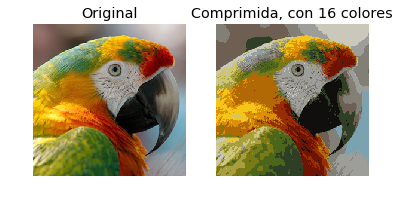

In [105]:
from sklearn.cluster import KMeans
from scipy import misc

print('Ejecutando clustering de k-means en los pixels de una imagen... \n');

# Cargar la imagen y convertirla en un arreglo numpy
A = misc.imread('macaw_small.jpg')
A = np.asarray(A, dtype=float)

# Dividir entre 255 para que los valores estén en el rango 0 - 1
A = A / 255

# Tamaño de la imagen
img_size = A.shape

# Convertir la imagen en una matrix N x 3, donde N = número de pixels.
# Cada fila contiene los valores de Rojo, Verde y Azul
# Esto nos da la matriz del conjunto de datos X que usaremos con k-means
X = A.reshape((img_size[0] * img_size[1], 3))

K = 16

# Definición del modelo
# Se puede añadir verbose=1 para seguir la ejecución
modeloKMeans = KMeans(n_clusters=K) 

# Ajuste del modelo
# Nota que por ser clustering sòlo se entrena con 'X', no hay 'y'
modeloKMeans.fit(X)

# Los K centroides
centroids = modeloKMeans.cluster_centers_

# Indice de los centroides más cercanos a cada pixel
idx = modeloKMeans.labels_

print('Aplicando k-means para comprimir una imagen... \n');

# Encontrar los centroides más cercanos a cada pixel
idx = findClosestCentroids(X, centroids)

# Esencialmente, hemos representado la imagen X en función 
# de los índices en idx

# Ahora podemos recuperar la imagen a partir de los índices (idx)
# mapeando cada pixel (identificado con su índice en idx) al valor
# de su centroide
X_recovered = centroids[idx]

# Transformar la imagen recuperada en sus dimensiones originales
X_recovered = X_recovered.reshape((img_size[0], img_size[1], 3))

# Mostrar la imagen original y la recuperada
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.axis('off')
ax1.imshow(A)
ax1.set_title('Original')
ax2.axis('off')
ax2.imshow(X_recovered)
ax2.set_title('Comprimida, con %d colores' % K)